# Loan Data From Prosper
## by Sindi Ingraham

## Introduction
> This data contains 113.937 loans with 81 variables. There are some columns for various characteristics of each loan, such as the loan amount, current status, and borrower's income. There are also columns for informations about the borrower, including their credit score, employments status, and wheter or not they are a homeowner. Other columns provide information about listing such as the listing's Prosper rating, the date the credit profile was pulled and more.
 


## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# Load the dataset into a pandas dataframe.
loan_data = pd.read_csv('prosperLoanData.csv')
pd.set_option('display.max_columns', None)

In [3]:
# High-level overview of data shape and composition
print(loan_data.shape)
print(loan_data.info())
print(loan_data.head())

(113937, 81)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  

In [4]:
# Statistics for numercal variables
loan_data.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,StatedMonthlyIncome,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,113937.000000,106312.000000,113346.000000,113346.000000,106333.000000,106333.000000,113240.000000,113937.00000,113937.000000,113240.000000,112778.000000,113240.000000,106315.000000,112947.000000,113240.000000,106333.000000,1.063330e+05,106333.000000,106393.000000,106393.000000,106393.000000,106393.000000,105383.000000,1.139370e+05,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,18928.000000,113937.000000,16952.000000,113937.000000,113937.000000,113937.00000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,2.774209,96.071582,685.567731,704.567731,10.317192,9.260164,26.754539,6.96979,398.292161,1.435085,5.584405,0.592052,984.507059,4.154984,0.312646,0.015094,1.759871e+04,0.561309,11210.225447,23.230034,0.885897,0.802327,0.275947,5.608026e+03,1.421100,22.934345,22.271949,0.613629,0.048540,8472.311961,2930.313906,-3.223214,152.816539,16.268464,31.896882,69444.474271,8337.01385,272.475783,4183.079489,3105.536588,1077.542901,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,3.996797,94.480605,66.458275,66.458275,5.457866,5.022644,13.637871,4.63097,447.159711,2.437507,6.429946,1.978707,7158.270157,10.160216,0.727868,0.154092,3.293640e+04,0.317918,19818.361309,11.871311,0.148179,1.097637,0.551759,7.478497e+03,0.764042,19.249584,18.830425,2.446827,0.556285,7395.507650,3806.635075,50.063567,466.320254,9.005898,29.974184,38930.479610,6245.80058,192.697812,4790.907234,4069.527670,1183.414168,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,0.000000,0.000000,0.000000,19.000000,0.000000,0.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-209.000000,0.000000,0.000000,0.000000,1.000000,1000.00000,0.000000,-2.349900,0.000000,-2.349900,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000

There are some columns with the wrong datatype such as ListingNumber that is an integer but should be an object, LoanOriginationDate that is an interger when should be datetime and others. I would drop the columns that I would not need for the analysis and change the datatype if applicable before start the enivariate exploration.

### What is the structure of your dataset?

> This dataset contains 113.937 loans with 81 variables on each loan. All the columns contains data type such object, integer and float, only the columns IsBorrowerHomeowner,CurrentlyInGroup, and IncomeVerifiable have a Boolean datatype.

### What is/are the main feature(s) of interest in your dataset?

> I am interested in analyzing if the borrower's credit score, employment status, Borrower's Rate, and their income affect or influence their loan performance.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect that analyzing the borrower's credit score, income, employment status and Prosper rating, as well as columns that describe the loan such as loan amount, interest rate, and term help me to understand if those aspect influence or affect the borrower's loan performance.

In [50]:
# I am copying the dataset to not affect the orginal.
clean_loan = loan_data.copy()

In [51]:
# I will drop all the columns that I do not need for this analysis to be more efficient and have a better view of the columns that I am interested to analyze.
clean_loan.drop(['ListingKey','ListingNumber','ListingCreationDate','ClosedDate','LenderYield','EstimatedEffectiveYield','EstimatedLoss','EstimatedReturn','ProsperRating (numeric)','ProsperRating (Alpha)',
              'ListingCategory (numeric)','BorrowerState','IsBorrowerHomeowner','CurrentlyInGroup','GroupKey','DateCreditPulled','FirstRecordedCreditLine','TotalCreditLinespast7years','OpenRevolvingAccounts',
              'OpenRevolvingMonthlyPayment','InquiriesLast6Months','TotalInquiries','CurrentDelinquencies','AmountDelinquent','DelinquenciesLast7Years','PublicRecordsLast10Years','PublicRecordsLast12Months',
              'RevolvingCreditBalance','BankcardUtilization','AvailableBankcardCredit','TotalTrades','TradesOpenedLast6Months','IncomeVerifiable','TotalProsperLoans','TotalProsperPaymentsBilled',
              'OnTimeProsperPayments','ProsperPaymentsLessThanOneMonthLate','ProsperPaymentsOneMonthPlusLate','ProsperPrincipalBorrowed','ProsperPrincipalOutstanding','ScorexChangeAtTimeOfListing','LoanFirstDefaultedCycleNumber',
              'LoanMonthsSinceOrigination','LoanOriginationQuarter','LP_CustomerPayments','LP_CustomerPrincipalPayments','LP_InterestandFees','LP_ServiceFees','LP_CollectionFees','LP_GrossPrincipalLoss',
              'LP_NetPrincipalLoss','LP_NonPrincipalRecoverypayments','PercentFunded','Recommendations','InvestmentFromFriendsCount','InvestmentFromFriendsAmount','Investors','TradesNeverDelinquent (percentage)'], axis = 1, inplace = True)
              

In [52]:
#Checking that I drop all the innecessary columns
clean_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 23 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   CreditGrade                28953 non-null   object 
 1   Term                       113937 non-null  int64  
 2   LoanStatus                 113937 non-null  object 
 3   BorrowerAPR                113912 non-null  float64
 4   BorrowerRate               113937 non-null  float64
 5   ProsperScore               84853 non-null   float64
 6   Occupation                 110349 non-null  object 
 7   EmploymentStatus           111682 non-null  object 
 8   EmploymentStatusDuration   106312 non-null  float64
 9   CreditScoreRangeLower      113346 non-null  float64
 10  CreditScoreRangeUpper      113346 non-null  float64
 11  CurrentCreditLines         106333 non-null  float64
 12  OpenCreditLines            106333 non-null  float64
 13  DebtToIncomeRatio          10

In [53]:
# I will change the datatype from the columns term and loanNumber
clean_loan = clean_loan.astype({'Term': object, 'LoanNumber': object})

# Verifying if the datatype were changed
print(clean_loan.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 23 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   CreditGrade                28953 non-null   object 
 1   Term                       113937 non-null  object 
 2   LoanStatus                 113937 non-null  object 
 3   BorrowerAPR                113912 non-null  float64
 4   BorrowerRate               113937 non-null  float64
 5   ProsperScore               84853 non-null   float64
 6   Occupation                 110349 non-null  object 
 7   EmploymentStatus           111682 non-null  object 
 8   EmploymentStatusDuration   106312 non-null  float64
 9   CreditScoreRangeLower      113346 non-null  float64
 10  CreditScoreRangeUpper      113346 non-null  float64
 11  CurrentCreditLines         106333 non-null  float64
 12  OpenCreditLines            106333 non-null  float64
 13  DebtToIncomeRatio          10

In [54]:
# With this new data frame, I will get the descriptive statistics for numerical data
clean_loan.describe()

,BorrowerAPR,BorrowerRate,ProsperScore,EmploymentStatusDuration,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenCreditLines,DebtToIncomeRatio,StatedMonthlyIncome,LoanCurrentDaysDelinquent,LoanOriginalAmount,MonthlyLoanPayment
count,113912.000000,113937.000000,84853.000000,106312.000000,113346.000000,113346.000000,106333.000000,106333.000000,105383.000000,1.139370e+05,113937.000000,113937.00000,113937.000000
mean,0.218828,0.192764,5.950067,96.071582,685.567731,704.567731,10.317192,9.260164,0.275947,5.608026e+03,152.816539,8337.01385,272.475783
std,0.080364,0.074818,2.376501,94.480605,66.458275,66.458275,5.457866,5.022644,0.551759,7.478497e+03,466.320254,6245.80058,192.697812
min,0.006530,0.000000,1.000000,0.000000,0.000000,19.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1000.00000,0.000000
25%,0.156290,0.134000,4.000000,26.000000,660.000000,679.000000,7.000000,6.000000,0.140000,3.200333e+03,0.000000,4000.00000,131.620000
50%,0.209760,0.184000,6.000000,67.000000,680.000000,699.000000,10.000000,9.000000,0.220000,4.666667e+03,0.000000,6500.00000,217.740000
75%,0.283810,0.250000,8.000000,137.000000,720.000000,739.000000,13.000000,12.000000,0.320000,6.825000e+03,0.000000,12000.00000,371.580000
max,0.512290,0.497500,11.000000,755.000000,880.000000,899.000000,59.000000,54.000000,10.010000,1.750003e+06,2704.000000,35000.00000,2251.510000


## Univariate Exploration

> I will start seeing the distribution of each of the variables I am interested in such as: Income Range, Employment Status, Borrower rate or intereste rate and the variable that determinate the loan perfomance or whether the borrower pay or not their loans, in this case loan status.


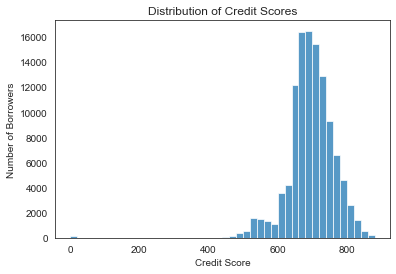

In [55]:
# I started with a histogram of the credit score to understand the distribution on the credit score among borrowers
binsize = 20
bins = np.arange(0,clean_loan['CreditScoreRangeLower'].max()+binsize, binsize)

sb.histplot(data = clean_loan, x='CreditScoreRangeLower', bins = bins)
sb.set_style('white')
plt.title('Distribution of Credit Scores')
plt.xlabel('Credit Score')
plt.ylabel('Number of Borrowers')
plt.show()

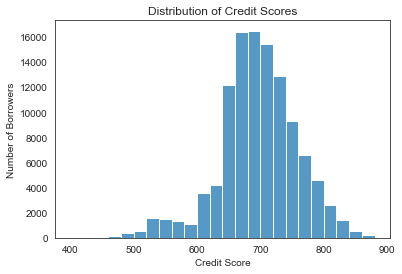

In [56]:
# I will start the bins from 400 to have a clearer picture of the distribution and see if the value of 0 affect the distribution.
binsize = 20
bins = np.arange(400,clean_loan['CreditScoreRangeLower'].max()+binsize, binsize)

sb.histplot(data = clean_loan, x='CreditScoreRangeLower', bins = bins)
sb.set_style('white')
plt.title('Distribution of Credit Scores')
plt.xlabel('Credit Score')
plt.ylabel('Number of Borrowers')
plt.show()

The first plot reveals the presence of an outlier at a credit score of 0. Removing this outlier shifts the starting points of the plot, providing a more comprenhensive view of the data. The majority of borrowers have credit scores ranging from approximately 650 to 750 points, with a minumim score of 0 and a maximum score of approximately 900 points. It is worth investigatin whether score of 0 is a data error. However, it is nocitable that it did not affect the distribution.

Next, I will check the distribution of the CreditScoreRangeUpper.

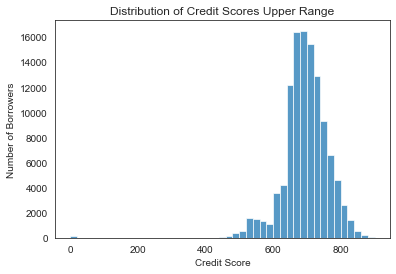

In [57]:
# I started with a histogram of the credit score upper range to understand the distribution on the credit score among borrowers
binsize = 20
bins = np.arange(0,clean_loan['CreditScoreRangeUpper'].max()+binsize, binsize)

sb.histplot(data = clean_loan, x='CreditScoreRangeUpper', bins = bins)
sb.set_style('white')
plt.title('Distribution of Credit Scores Upper Range')
plt.xlabel('Credit Score')
plt.ylabel('Number of Borrowers')
plt.show()

The column CreditScoreRangeUpper is not different from the CreditScoreRangeLower since the distribution is the same. I will be using CreditScoreRangeLower in the rest of the exploration.

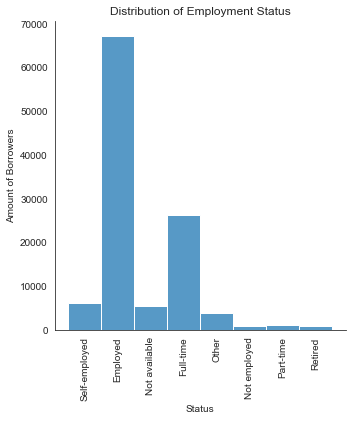

In [59]:
# The next variable I will check the distribution is employment status
sb.displot(data = clean_loan, x = 'EmploymentStatus')
plt.xlabel('Status')
plt.ylabel('Amount of Borrowers')
plt.title('Distribution of Employment Status')
plt.xticks(rotation = 90)
plt.show()

The distribution of Employments Status among borrowers in the dataset is characterized by a majority of employed individuals, accounting for approximately 61% of the total dataset with around 70.000 borrowers. Additionally, a significant proportion of the borrowers constituting around 26% or 30.000 borrowers are full-time workers. However, it is noteworthy that a proportion of borrowers are reported as not employed, prompting further investigatios to understand the possible reasons for this observation. This could be due to data entry errors or other reasons such as unemployment benefits. It would be worthwhile to examine the occupation and loan amount of these individuals to determine if the reported employment statust is accurate or if there are any discrepancies in the data.

In [64]:
#Checking the occupation and loan amount for not employed borrowers
unemployed_borrowers = clean_loan[(clean_loan['EmploymentStatus']=='Not employed') & (clean_loan['LoanOriginalAmount']>=0)]
df_check = unemployed_borrowers[['EmploymentStatus','LoanOriginalAmount','EmploymentStatusDuration','Term']]
print(df_check.head(5))

    EmploymentStatus  LoanOriginalAmount  EmploymentStatusDuration Term
66      Not employed                1000                       1.0   36
100     Not employed                4000                      12.0   36
125     Not employed                5000                       8.0   36
170     Not employed               10000                       9.0   36
186     Not employed                4000                       7.0   36


The analysis of the employment statust of borrowers in the dataset revealed an unexpected proportion of individuals who are reported as not employed. In the code above we can see that this may be due to the fact that these borrowers were employed at the time of loan application, but their employments status expired or their employment offer ended prio to the loan being fully repaid.

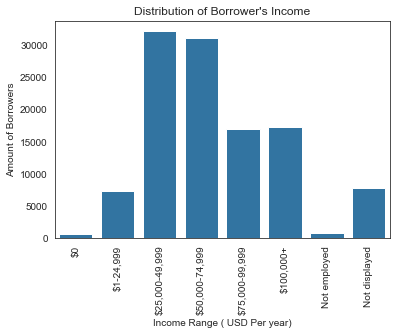

In [65]:
# I creaded a bar chart to see what is the most common income range among the borrowers.
base_color = sb.color_palette()[0]
sb.countplot(data=clean_loan, x = 'IncomeRange', color = base_color, order =  ['$0','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+','Not employed','Not displayed'])
plt.title("Distribution of Borrower's Income")
plt.xlabel('Income Range ( USD Per year)')
plt.ylabel('Amount of Borrowers')
plt.xticks(rotation=90)
plt.show()


The income range of borrowers in the dataset revealed that the majority of individuals fall within the range of USD25,000 - USD74,999 per year. This demographic is further divided into two sub-ranges, USD25,000 - USD49,999 and USD 50,000 - USD74,999, each representing approximately 28% and 27% of the total dataset, respectively. However, upon further examination, it was noted that a small proportion of borrowers reported a zero income. This initially raised concerns as a source of income is typically a prerequisite for loan eligibility. However, the investigation above revealed that these individuals had a reported income and employment status at the time the loan was originated.

Next, I will analyze the distribution of the Borrower's loan Rate.

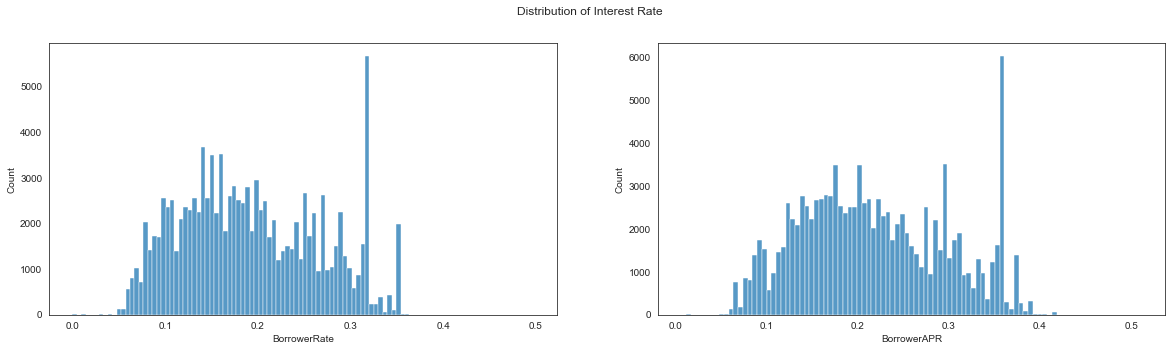

In [66]:
# Distribution of the Borrowers APR and Borrower Rate, the APR is the anual percentage rate for the loan and the borrowers rate is the interest for the loan
fig = plt.figure(figsize = [20,5])
#bins = np.arange(0, df_loan['BorrowerRate'].max()+0.1,0.1)
fig.suptitle('Distribution of Interest Rate')
plt.subplot(1,2,1)
sb.histplot(data=clean_loan, x='BorrowerRate')

plt.subplot(1,2,2)
sb.histplot(data=clean_loan, x='BorrowerAPR')

plt.show()

The distribution of Borrower Rate and Borrower APR appears to be similar. However, upon closer examination, it can be seen that the Borrower Rate distribution has a peak near 0.3% interest rate, whereas the peak for Borrower APR is closer to 0.4%. Additionally, it is observed that some borrowers received a relatively low interest rate of less than 0.1%. This prompts an investigation to determine if there is a correlation between this low interest rate and variables such as income range, credit score, and employment status.

Lastly in this section, I will plot the distribution of the variables that determinates the loan performance such as Loan current delinquent days and loan status.

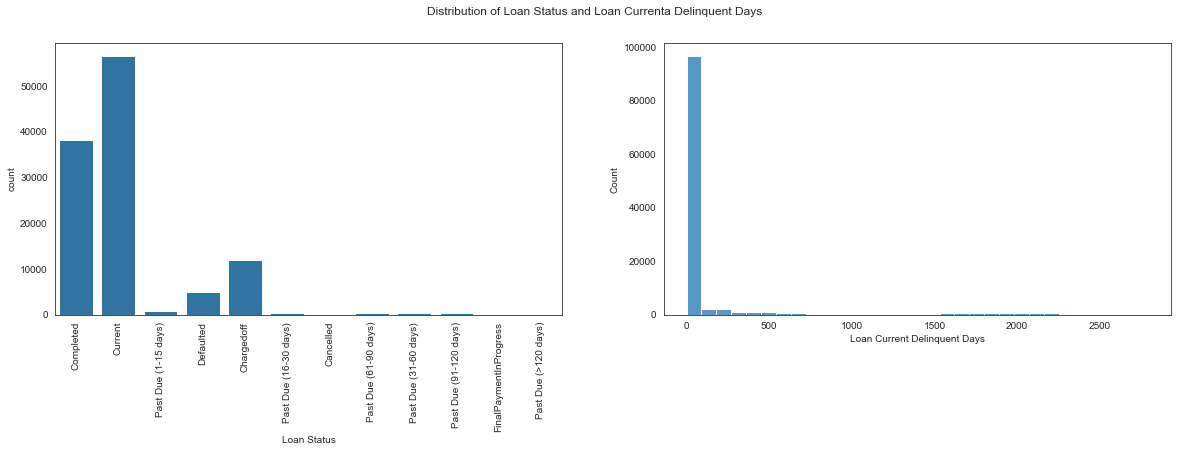

In [67]:
fig = plt.figure(figsize = [20,5])
fig.suptitle('Distribution of Loan Status and Loan Current Delinquent Days')

plt.subplot(1,2,1)
base_color = sb.color_palette()[0]
sb.countplot(data=clean_loan, x='LoanStatus', color = base_color)
plt.xticks(rotation = 90)
plt.xlabel('Loan Status')

plt.subplot(1,2,2)
bins = np.arange(0, clean_loan['LoanCurrentDaysDelinquent'].max()+90,90)
sb.histplot(data=clean_loan, x='LoanCurrentDaysDelinquent', bins = bins)
plt.xlabel('Loan Current Delinquent Days')


plt.show()

Approximately 52% of the borrowers in the dataset have paid their loan on time, while 34% or roughly 40,000 have fully repaid their loans. Additionally, there is a certain percentage of borrowers who have defaulted on their loans, as evidenced by the distribution of delinquent days, which includes outliers with more than 1,500 days delinquent. This suggests a potential correlation with those who have defaulted on their payments.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The credit score variable revealed the presence of outliers, specifically, a credit score of 0 for some borrowers. In order to further investigate the impact of these outliers on the distribution, the bin size was adjusted. However, upon re-examination, no significant changes were observed in the distribution. As such, it was determined that the outlier credit scores of 0 would not be included in the visualization in order to avoid skewing the results.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The analysis of the employment status, income range, and interest rate variables, some observations of individuals with zero income and unemployed status were noted. These instances were likely a result of changes in employment status for some borrowers after obtaining the loan. Despite this, these instances did not constitute a significant portion of the data and did not significantly impact the distributions of the other variables. As such, these data points were kept for the analysis. However, in the next stage of analysis, I'd to examine if any correlation exists between these variables.

## Bivariate Exploration

> To start off with, I would like to look at the relationship that the variables have with the ones that represent the loan performance, loan status and loan delinquent days.


In [68]:
#Plot to determinate the relationship between Income range and the loan performance variabes (loan status and delinquent days)
# First, I replace some records in the income range from not employed to 0.
clean_loan['IncomeRange'] = clean_loan['IncomeRange'].replace({'Not employed':'$0'})
clean_loan['IncomeRange'].value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
$0                 1427
Name: IncomeRange, dtype: int64

Text(0.5, 1.0, 'Income Range vs Loan Delinquent Days')

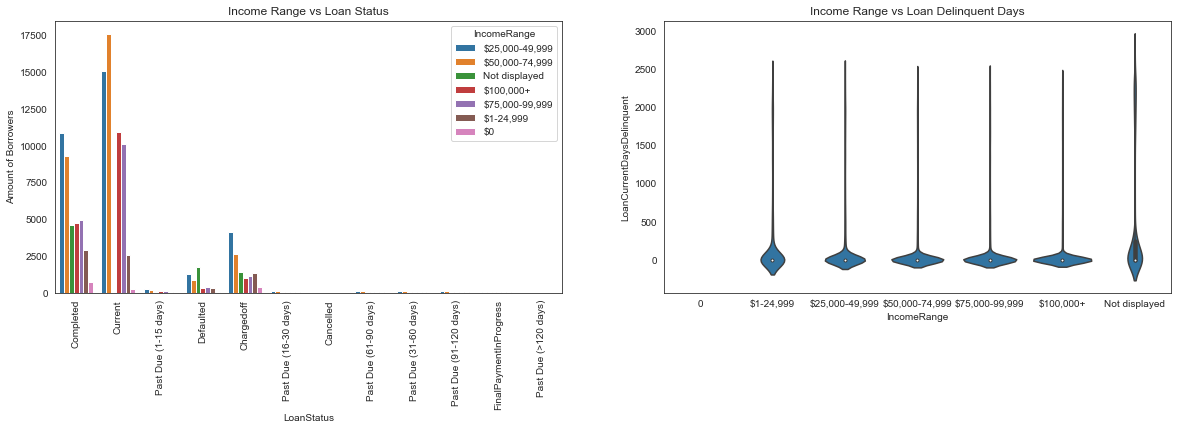

In [103]:
# relationship between Income range and the loan performance variables (loan status and delinquent days)

fig = plt.figure(figsize =[20,5])
plt.subplot(1,2,1)
bar_plot = sb.countplot(data = clean_loan, x='LoanStatus', hue='IncomeRange')
plt.xticks(rotation=90)
plt.title('Income Range vs Loan Status')
plt.ylabel('Amount of Borrowers')


plt.subplot(1,2,2)
sb.violinplot(data = clean_loan, x='IncomeRange', y='LoanCurrentDaysDelinquent', order = ['0','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+','Not displayed'], color=base_color)           
plt.title('Income Range vs Loan Delinquent Days')             
             

A majority of loans fall under the categories of "current" and "completed." Furthermore, it has been observed that the income ranges with the highest number of loans falling under "current" and "completed" are USD25,000 - USD49,999 and USD50,000 - $74,999. This result aligns with the expectation as these income ranges have the highest number of borrowers. However, it has also been found that the income range does not have a significant influence on loan delinquency, as the median number of delinquent days among all income ranges is similar and there are outliers present with more than 1500 delinquent days.

Next, I will checK the correlation between employment status and the variables that are defined to determinated the loan performance.

Text(0, 0.5, ' Loan Delinquent Days')

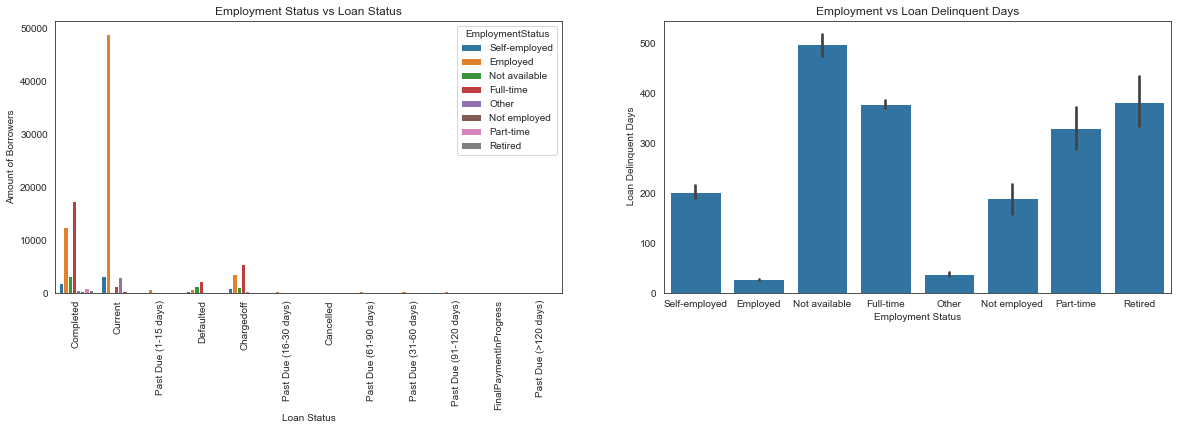

In [117]:
# Plot employment status vs loan status
fig = plt.figure(figsize =[20,5])
plt.subplot(1,2,1)
bar_plot = sb.countplot(data = clean_loan, x='LoanStatus', hue='EmploymentStatus')
plt.title('Employment Status vs Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Amount of Borrowers')
plt.xticks(rotation=90)

# plot Employment status vs delinquent days 
plt.subplot(1,2,2)
sb.barplot(data = clean_loan, x='EmploymentStatus', y='LoanCurrentDaysDelinquent', color=base_color)           
plt.title('Employment vs Loan Delinquent Days')  
plt.xlabel('Employment Status')
plt.ylabel(' Loan Delinquent Days')

As anticipated, a majority of employed borrowers have a current loan status. However, an unexpected finding is that a greater proportion of full-time workers have paid off their loans compared to other categories of employed workers.Furthermore, On average, employed borrowers generally have the least number of delinquent days on their loans. Contrarily, full-time, part-time, and retired workers had a higher number of delinquent days on their loans than those whore were not employed.

Next, I would like to see if exits any correlation between borrower rate received and the loan performance variables.

Loan_sample.shape= (1000, 23)


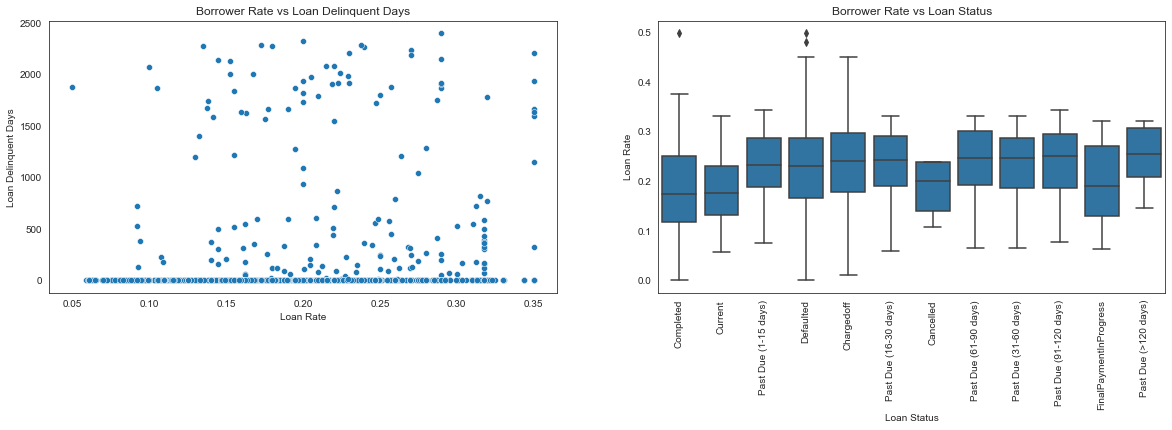

In [102]:
# scatter plot Borrower rate vs loan delinquent days
# I will take a sample of the borrowers to make the scatterplot less crowder
loan_sample = clean_loan.sample(n=1000,replace=False)
print("Loan_sample.shape=",loan_sample.shape)

plt.figure(figsize = [20,5])
plt.subplot(1,2,1)
sb.scatterplot(data=loan_sample, x='BorrowerRate', y='LoanCurrentDaysDelinquent')
plt.title('Borrower Rate vs Loan Delinquent Days')
plt.xlabel('Loan Rate')
plt.ylabel('Loan Delinquent Days');

plt.subplot(1,2,2)
sb.boxplot(data=clean_loan, x='LoanStatus',y='BorrowerRate', color = base_color)
plt.title('Borrower Rate vs Loan Status')
plt.xticks(rotation = 90)
plt.xlabel('Loan Status')
plt.ylabel('Loan Rate');


The analysis of the relationship between the interest rate and delinquency days of the loans shows that there is no apparent correlation between these variables, as the data points are distributed across the scatter plot without showing any clear pattern.On the other hand, it has been observed that the majority of borrowers who received a lower interest on average have successfully "paid off" or pay on time their loans. Nevertheless, a notable proportion of borrowers who received an interest rate of 0% have defaulted on their payments.This suggests that there may be other factors that influence loan delinquency, in addition to the interest rate.

Next, I want to look at the relationship between the credit score and the interest the borrowers got for their loan.

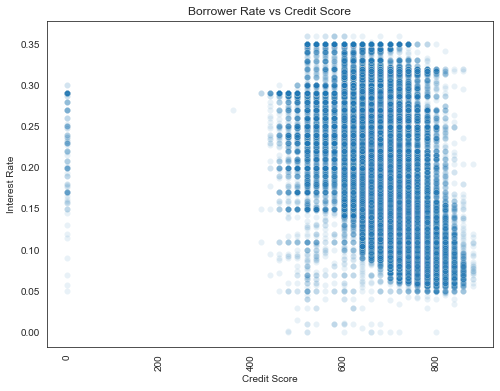

In [80]:
# Scatter plot Credit Score vs Interest rate
plt.figure(figsize = [8, 6])
sb.scatterplot(data=clean_loan, x='CreditScoreRangeLower', y='BorrowerRate',alpha = 1/10 )
plt.title('Borrower Rate vs Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Interest Rate')
plt.xticks(rotation=90);

There appears to be a weak relationship between a borrower's credit score and the interest rate they received. Additionally, it appears that some borrowers with a credit score of 0 were still able to obtain a loan, which may indicate that other factors are taken into consideration when qualifying a borrower or that there could be errors in the data.

I still want to see if exits a relationship between the income of the borrowers and the interest they received in their loan, also the interest and employment status.

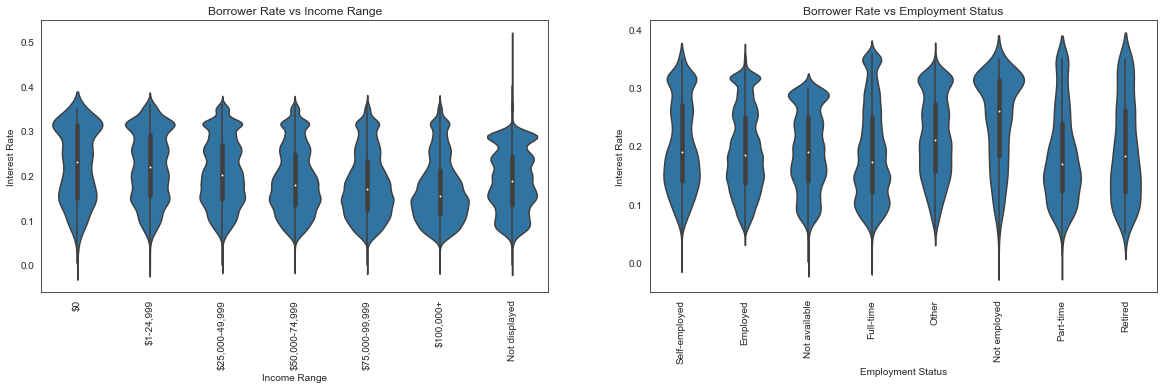

In [81]:
plt.figure(figsize = [20, 5])

# Income range vs Borrower rate
plt.subplot(1,2,1)
sb.violinplot(data=clean_loan, x='IncomeRange', y='BorrowerRate', order= ['$0','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+','Not displayed'], color=base_color)
plt.title('Borrower Rate vs Income Range')
plt.xlabel('Income Range')
plt.ylabel('Interest Rate')
plt.xticks(rotation=90);

plt.subplot(1,2,2)
sb.violinplot(data=clean_loan, x='EmploymentStatus', y='BorrowerRate', color=base_color)
plt.title('Borrower Rate vs Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Interest Rate')
plt.xticks(rotation=90);

The plots indicate a slight correlation between a borrower's income and the interest rate received. On average, it appears that borrowers with higher income tend to receive lower interest rates. This relationship is consistent with the borrower's employment status, as those who are not employed tend to receive higher interest rates on average. It is important to note that a subsequent analysis revealed that these borrowers were employed at the time the loan was processed. This information should be taken into account when interpreting the data.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

- There is a slight relationship between the borrower income range and their loan status. The highest number of loans falls under current and complete for a income range between USD25,000 and 74,999 and borrowers with an income of more than USD100,000 dont representage a higher percentage in the dataset.
- There is no a significant relationship between the income range and loan delinquency, as the median number of delinquent days is similar among all income ranges.
- A majority of employed borrowers have a current loan status, but a greater proportion of full-time workers have paid off their loans compared to other categories of employed workers.
- Employed borrowers have the least number of delinquent days on their loans, while full-time, part-time, and retired workers had a higher number of delinquent days on their loans than those who were not employed.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

- There is a slight correlation between a borrower's income and the interest rate received and the borrower income, where borrowers with higher income tend to receive lower interest rate. This is consistent with the borrower's employment status, as those who are not employed tend to received higher interest rates on average.

## Multivariate Exploration

> After find some correlation between the variables, I would like to analyze how the variables Income range, emply0ment status, interest rate interact with the loan performance variable, in this case Loan status. The loan delinquent days is not going to be included since in the loan status variables we can find rows that imply that the borowwer has delinquent days in their loans.

In [110]:
#First I will convert the income range into a ordered categorical type.

ordinal_var_dict = {'IncomeRange':['$0','$1-24,999','$25,000-49,999','$50,000-74,999','$100,000+','Not displayed']}
for var in ordinal_var_dict:
    ordered_var=pd.api.types.CategoricalDtype(ordered=True,categories=ordinal_var_dict[var])
    clean_loan[var] = clean_loan[var].astype(ordered_var)

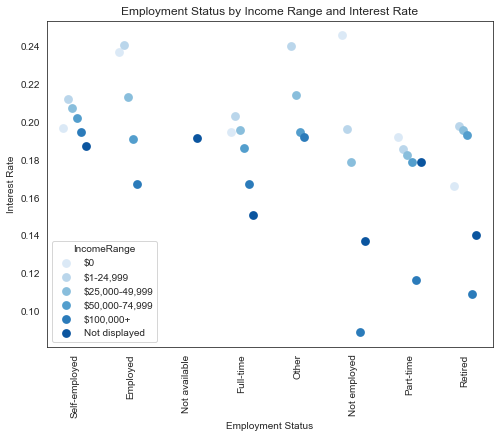

In [116]:
# I want to see how the interest variables interact with each other (Income range, employment status and interest rate)

plt.figure(figsize=[8,6])
sb.pointplot(data=clean_loan, x='EmploymentStatus',y='BorrowerRate',hue='IncomeRange', palette = 'Blues', linestyles = '',dodge=0.4, errorbar = None)
plt.xticks(rotation=90)
plt.title('Employment Status by Income Range and Interest Rate')
plt.xlabel('Employment Status')
plt.ylabel('Interest Rate')            
plt.show()

There is not a clear interaction between the variables Income, Interest Rate and Employment status since the data points are spread out.

Next, I want to see how interact two of the variables with the loan performance variable, in this case loan status.

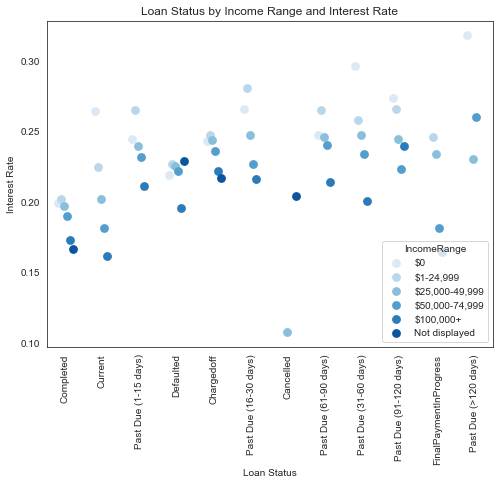

In [114]:
#First variables Income range and Interest rate against loan performance variables, loan status.

plt.figure(figsize=[8,6])
sb.pointplot(data=clean_loan, x='LoanStatus',y='BorrowerRate',hue='IncomeRange', palette = 'Blues', linestyles = '',dodge=0.4, errorbar = None)
plt.xticks(rotation=90)
plt.title('Loan Status by Income Range and Interest Rate')
plt.xlabel('Loan Status')
plt.ylabel('Interest Rate')            
plt.show()
      

There is a slight correlation between borrowers who received a lower interest rate and paid off their loan, and having a source of income, with fewer loan delinquent days. However, this plot alone cannot determine with certainty that factors such as income and interest rate directly affect loan performance.

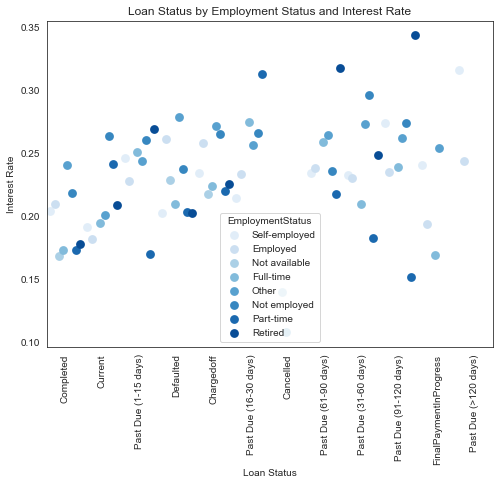

In [115]:
# Loan Status across employment status and interest rate

plt.figure(figsize=[8,6])
sb.pointplot(data=clean_loan, x='LoanStatus',y='BorrowerRate',hue='EmploymentStatus', palette = 'Blues',linestyles = '',dodge=0.8, errorbar = None)
plt.xticks(rotation=90)
plt.title('Loan Status by Employment Status and Interest Rate')
plt.xlabel('Loan Status')
plt.ylabel('Interest Rate')            
plt.show()

This plot is less clear than the one above, as it does not display a clear pattern or relationship among these three variables.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> I extended my investigation of borrowers' loan performance by looking the relationship between the 3 main variables income range, interest rate and employment status agains loan status. The multivariate plots showed that even there is a slight relationship between the interest rate the borrower received, their income in whether the paid or not their loan, there are not determined factors in this performance and imply that other variables might be affecting or influence their loan performance.

### Were there any interesting or surprising interactions between features?

> Looking back in the first point plot, it does not seem there is a interaction between the three variables, however, each one can impact the loan performance individually, it doesn not imply that all together influence that the borrower pay or not their loans.

## Conclusions
- The majority of the borrowers credit score goes from 650 to 750 points to get a loan with prosper. However, there are proportions of borrowers with lower and highest credit score which imply there are other factors that determinates whether an individual qualify or not.
- Approximately 61% or around 70.000 borrowers are employed, aditionally, 26% or 30,000 are full time workers.
- The majority of borrowers' income range goes from USD 25,000 to USD 74,999 per year, representing 55% of the dataset.
- Approximately 52% of the borrowers have paid their loan monthly payment on time, 34% have fully repaid their loan, while 14% of the borrowers have delinquent days, defaulted to pay or charge off their loans.
- The borrowers who received a lower interest on average have successfully "paid off" or pay on time their loans. Nevertheless, a notable proportion of borrowers who received an interest rate of 0% have defaulted on their payments.This suggests that there may be other factors that influence loan delinquency, in addition to the interest rate.
- Income range, Employment Status, and Interest rate can slightly influence or affect the borrowers loan performance, however, there are not determined factors in this performance and imply that other variables might be affecting or influence their loan performance.